<img src="https://www.instadeep.com/wp-content/uploads/2019/03/logo-instadeep-longeur.png" width="200px">

# building a phylogenetic tree based on multi fasta protein sequences

target protien : Leishmanolysin

Alternative Name(s) : Glycoprotein gp63, Promastigote surface endopeptidase.

Gene : LMLN

it's membrane-bound glycoprotei.

present in the promastigote of various species of Leishmania protozoans that are responsible for the disease leishmaniasis.

Belongs to peptidase family M8.

information from [Expasy](https://enzyme.expasy.org/EC/3.4.24.36).

In [ ]:
import py3Dmol

from Bio import SeqIO
from Bio import AlignIO
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor

import numpy as np

from PIL import Image 
import ipyplot
import glob

import os

In [4]:
#search for LEISHMANOLYSIN on PDB ( Aliase 1LML)
view = py3Dmol.view(width=400, height=300, query='1LML')
view.setStyle({'model': -1}, {"cartoon": {'color': 'spectrum'}})
view.zoomTo()
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

**steps**

In [5]:
#1.getting Leishmanolysin gene sequence from NCBI
#2.Blast search for similar gene sequences
#3.store in /fasta folder
#4.use muscle for alignment
#5.construct phylo tree with different distances 

## LMLN in different monkey species 

In [6]:
species = list(map(lambda x : x[:-6],os.listdir("fasta")))
sequences = []
for s in species:
    sequences.append(SeqIO.read("fasta/"+s+".fasta", "fasta"))


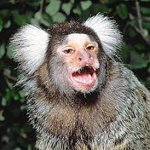
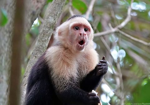
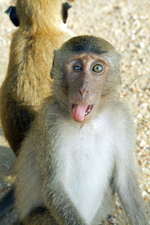
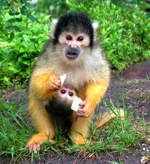
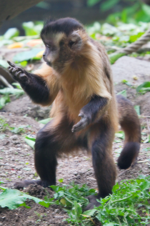
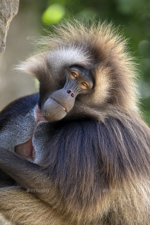


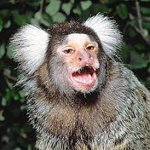
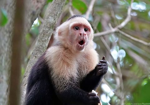
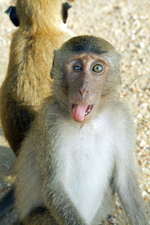
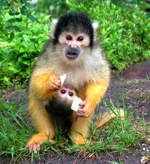
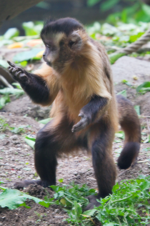
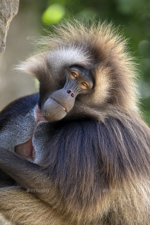

In [10]:
images = []
for f in glob.iglob("images/*"):
    images.append(np.asarray(Image.open(f)))
images = np.array(images,dtype=object)

ipyplot.plot_images(images,species)

In [158]:
for s in sequences:
    print(s.description,"\n gene length:",len(s))

SeqIO.write(sequences,"sequences.fasta","fasta")

XM_002759782.4 PREDICTED: Callithrix jacchus leishmanolysin like peptidase (LMLN), transcript variant X1, mRNA 
 gene length: 3262
XM_017541025.2 PREDICTED: Cebus imitator leishmanolysin like peptidase (LMLN), mRNA 
 gene length: 2823
XM_045387328.1 PREDICTED: Macaca fascicularis leishmanolysin like peptidase (LMLN), transcript variant X1, mRNA 
 gene length: 7707
XM_003930847.2 PREDICTED: Saimiri boliviensis boliviensis leishmanolysin like peptidase (LMLN), mRNA 
 gene length: 2606
XM_032264274.1 PREDICTED: Sapajus apella leishmanolysin like peptidase (LMLN), mRNA 
 gene length: 2082
XM_025377728.1 PREDICTED: Theropithecus gelada leishmanolysin like peptidase (LMLN), transcript variant X1, mRNA 
 gene length: 3624


**using muscle for multiple sequence alignment**

In [168]:
#cmd command
#muscle5.1.win64.exe -input sequences.fasta -output aligned.fasta

In [169]:
align = AlignIO.read("aligned.fasta", "fasta") 

#passing specie as id 

for a,s in zip(align,species):
    a.id = s
print(align)

Alignment with 6 rows and 7850 columns
---------------------------------CTCCATGGTAA...GTG Callithrix jacchus
GCGGGGCCGGCGCGGGCGCAGGGGCGTCACGCACTCCATGGTAA...GAA Cebus imitator
--------------------GAGGCGTCACGCACTCCATGGTAA...GTA Macaca fascicularis
---------------------------------CTCCATGGTAA...AAA Saimiri boliviensis
--------------------------------------------...TAA Sapajus apella
--------------------GAGGCGTCACGCACTCCATGGTAA...CCA Theropithecus gelada


In [174]:
calculator = DistanceCalculator(model="pam250")
distance_matrix = calculator.get_distance(align)
print(distance_matrix)


Callithrix jacchus	0
Cebus imitator	0.030559118690107856	0
Macaca fascicularis	0.3274024339068401	0.3598686610726013	0
Saimiri boliviensis	0.07884066676678181	0.09007364511865046	0.39350518433179726	0
Sapajus apella	0.08142608958380537	0.09028077753779695	0.3983651620370371	0.015098276051389026	0
Theropithecus gelada	0.1470823341326939	0.18889553429027117	0.24651882413615267	0.23579517955667406	0.2440852886768572	0
	Callithrix jacchus	Cebus imitator	Macaca fascicularis	Saimiri boliviensis	Sapajus apella	Theropithecus gelada


In [175]:
constructor = DistanceTreeConstructor(calculator)

In [176]:
tree = constructor.build_tree(align)
Phylo.draw_ascii(tree) 

                       ______ Theropithecus gelada
    __________________|
  _|                  |__________________________________ Macaca fascicularis
 | |
 | | Callithrix jacchus
_|
 |__ Cebus imitator
 |
 |         , Sapajus apella
 |_________|
           | Saimiri boliviensis



*questions*
* different gene length ?
* translation to protein => different protein size ?
* how can we get more accurate phylotrees (Homologous sequences, pam distance)?
* inline blast ?
* If Leishmanolysin causes diseases why do these mammals (including humans) produce it ?
